In [1]:
import os

path = "D:/Documentos/GitHub/likelihood"
os.chdir(path)

from likelihood.models import Arima, FourierRegression
from likelihood.tools import *
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.size"] = 12
plt.style.use("bmh")

path = "D:/Documentos/GitHub/likelihood/examples"
os.chdir(path)

In [2]:
# We generate a time series with 100 points and without slope
a = generate_series(2, 100, incline=False)
y_serie = np.copy(a)

Accuracy: 0.5224
RMSE: 1.1330
Confidence Interval: 1.0098


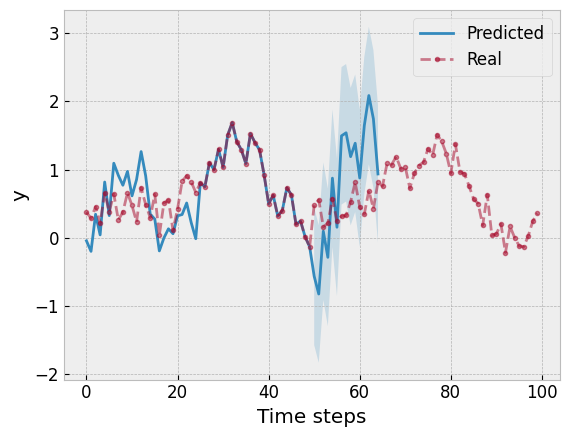


Summary:
-----------------------
Lenght of theta: 75
Mean of theta: 4.6364
-----------------------


In [3]:
p, d, q = 1, 0, 0.5
# Standardize the data and subtract the slope
scaler = DataScaler(a)
y_scale = scaler.rescale()
npoints = 50
y_train = y_scale[0, :npoints]
y_val = y_scale[0, npoints:]
# We define the regression model
model = Arima(y_train, p, d, q)
model.train(nwalkers=15)
model.save_model("model")
model = Arima(y_train, p, d, q)
model.load_model("model")
# We predict 15 points forward
y_pred = model.predict(15)
model.eval(y_val[:15], y_pred[-15])
y_pred = y_pred[..., np.newaxis]
y_pred = y_pred.reshape(-1, y_pred.shape[0])
y_pred = scaler.scale(y_pred)
model.plot_pred(y_serie[0, :], y_pred[0, :])
model.summary()

The 1-th row of the dataset has been denoised.
The period is 8.3333
The 2-th row of the dataset has been denoised.
The period is 25.0
Confidence Interval: 0.6119


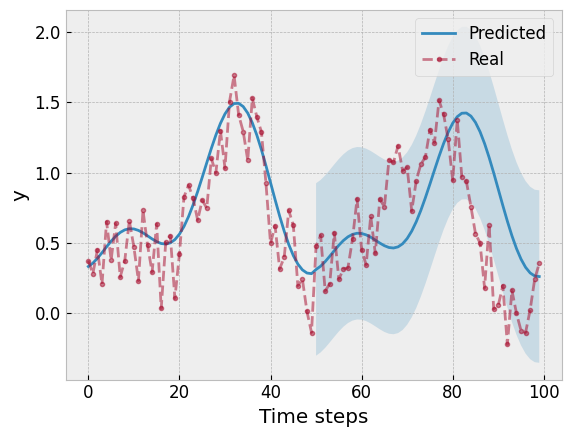

In [4]:
second_model = FourierRegression(y_scale[:, :npoints])
second_model.fit(sigma=1, mov=300, mode=True)
y_pred_second = second_model.predict(50, n_walkers=15, name="fourier_model", save=True)
y_pred = scaler.scale(y_pred_second)
second_model.plot_pred(y_serie[0, :], y_pred[0, :])
second_model = FourierRegression(y_scale[:, :npoints], npoints)
second_model.fit(sigma=1)
y_pred = scaler.scale(second_model.load_predict("fourier_model"))

Confidence Interval: 0.5319


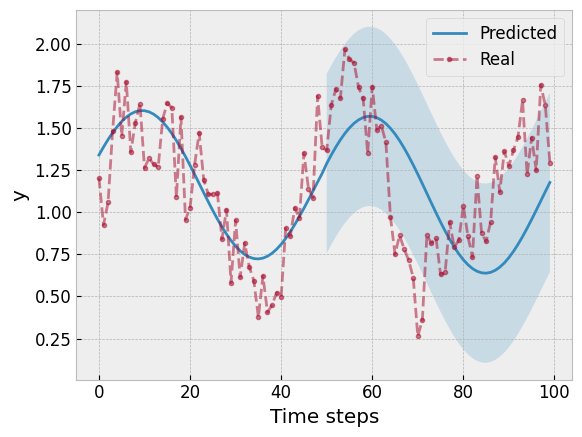

In [5]:
second_model.plot_pred(y_serie[1, :], y_pred[1, :])

Accuracy: 0.4054
RMSE: 0.4832
Confidence Interval: 0.6671


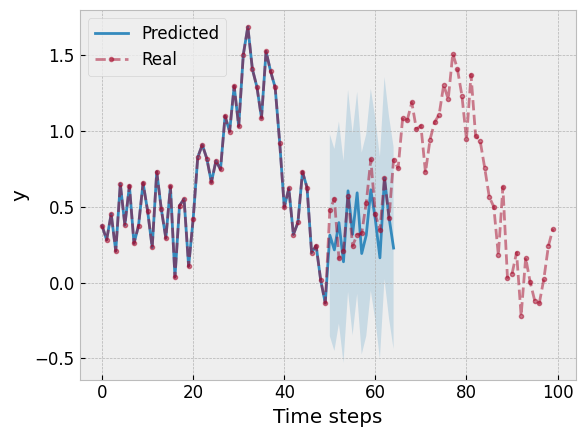


Summary:
-----------------------
Lenght of theta: 50
Mean of theta: 2.0880
-----------------------


In [6]:
# Can we improve the model by changing the number of mov?
model = Arima(y_train)
model.train(nwalkers=15, mov=300, weights=False)
model.save_model("arima_model")
model_loaded = Arima(y_train)
model_loaded.load_model("arima_model")
y_pred = model_loaded.predict(15)
model_loaded.eval(y_val[:npoints], y_pred[-npoints])
y_pred = y_pred[..., np.newaxis]
y_pred = y_pred.reshape(-1, y_pred.shape[0])
y_pred = scaler.scale(y_pred)
model_loaded.plot_pred(y_serie[0, :], y_pred[0, :])
model_loaded.summary()